In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten
from sklearn.cluster import KMeans
from PIL import Image

In [38]:
# reading a small dataset of first 200 car images
base_image_path = 'cars_small'
imgs_df = pd.DataFrame({'img_path':os.listdir(base_image_path)})
imgs_df.head()

,img_path
0,00001.jpg
1,00002.jpg
2,00003.jpg
3,00004.jpg
4,00005.jpg


In [43]:
# Data augmentation
generator = ImageDataGenerator(rescale=1./255).flow_from_dataframe(imgs_df, directory=base_image_path,
                                    x_col='img_path',y_col=None,
                                    target_size=(224,224),class_mode=None,
                                    batch_size=30)

Found 200 images.


In [48]:
# Building VGG16 model
vgg_model = Sequential()
vgg_model.add(VGG16(include_top = False, weights='vgg16_weights.h5'))
vgg_model.add(Flatten())

vgg_model.compile(optimizer='adam', loss='categorical_crossentropy')

In [50]:
# Getting features and storing path name as a new column name
img_encodings_df = pd.DataFrame(vgg_model.predict_generator(generator=generator))
img_encodings_df['img_path'] = imgs_df.img_path.values

In [57]:
# Building KMeans with 10 clusters
cluster_model = KMeans(n_clusters=10, random_state=42)
features = img_encodings_df.columns.drop('img_path')
cluster_model.fit(img_encodings_df[features])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [59]:
# Storing labels against each image
img_encodings_df['cluster'] = cluster_model.labels_

In [64]:
# Let us find all the car images which belong with second cluster
cluster_II = img_encodings_df[img_encodings_df.cluster==1]
cluster_II

,0,1,2,3,4,5,6,7,8,9,...,25080,25081,25082,25083,25084,25085,25086,25087,img_path,cluster
37,0.607455,0.0,0.000000,0.000000,0.110064,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.190303,0.000000,0.514041,0.0,0.161018,0.0,00038.jpg,1
69,0.000000,0.0,0.000000,0.000000,0.026567,0.0,0.044759,0.000000,0.0,0.0,...,0.000373,0.0,0.000000,0.658964,0.069488,0.0,0.253562,0.0,00070.jpg,1
96,0.073474,0.0,0.000000,0.000000,1.522597,0.0,0.000000,0.000000,0.0,0.0,...,0.480871,0.0,0.000000,0.386862,0.000000,0.0,0.754225,0.0,00097.jpg,1
122,0.181476,0.0,0.000000,0.000000,0.167566,0.0,0.000000,0.000000,0.0,0.0,...,0.014226,0.0,0.000000,0.439287,0.000000,0.0,0.532120,0.0,00123.jpg,1
145,0.477468,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.569168,0.0,0.000000,0.292257,0.000000,0.0,1.577121,0.0,00146.jpg,1
194,0.740335,0.0,0.131611,0.275089,0.000000,0.0,0.000000,0.025318,0.0,0.0,...,0.322086,0.0,0.000000,0.789926,0.000000,0.0,0.806973,0.0,00195.jpg,1
197,0.000000,0.0,0.032872,0.000000,0.047096,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.277171,1.019273,0.0,0.432802,0.0,00198.jpg,1


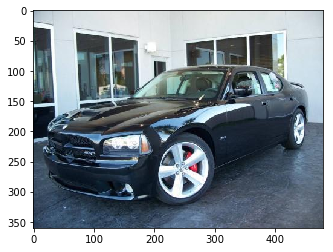

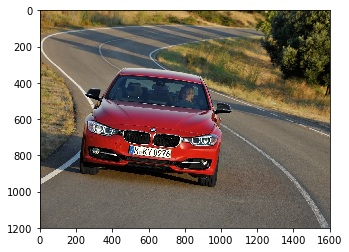

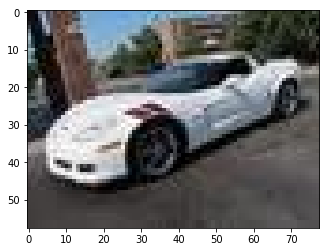

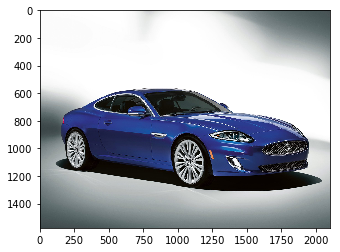

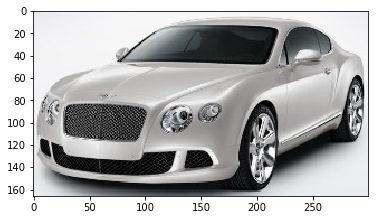

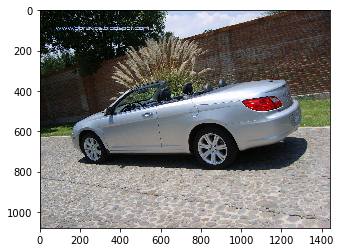

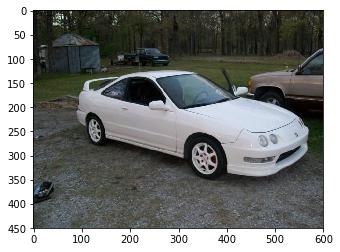

In [81]:
for i in range(cluster_II.shape[0]):
    plt.imshow(Image.open(base_image_path + '/' + cluster_II.img_path.iloc[i]))
    plt.show()